## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_data = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_data = pd.read_csv(mouse_data)
study_results = pd.read_csv(study_results)

#mouse_metadata.head()
#study_results.head()
## Merge the two DataFrames together based on the Year and State they share
merge_df = pd.merge(mouse_data, study_results, on="Mouse ID")
merge_df

combined_mouse = pd.merge(study_results, mouse_data, how='left', on="Mouse ID")
combined_mouse.head()

# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking thmerge_dfe number of mice.

total_mice = pd.unique(combined_mouse['Mouse ID'])
len(total_mice)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_count=len(combined_mouse)-len(combined_mouse.drop_duplicates())
duplicate_count

duplicate_mice = combined_mouse[combined_mouse.duplicated(["Mouse ID","Timepoint"])]
duplicate_mice = pd.DataFrame({"Mouse ID":duplicate_mice["Mouse ID"].unique()})

duplicate_mice=combined_mouse.loc[combined_mouse["Mouse ID"]==str(duplicate_mice.iloc[0,0]),:]
duplicate_mice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_df = combined_mouse.loc[combined_mouse['Mouse ID']!='g989']
cleaned_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice in the clean DataFrame.
mice_cleaned = pd.unique(cleaned_df['Mouse ID'])
len(mice_cleaned)

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_df = cleaned_df.groupby('Drug Regimen')

tumor_mean = summary_df['Tumor Volume (mm3)'].mean()
tumor_median = summary_df['Tumor Volume (mm3)'].median()
tumor_var = summary_df['Tumor Volume (mm3)'].var()
tumor_std = summary_df['Tumor Volume (mm3)'].std()
tumor_sem = summary_df['Tumor Volume (mm3)'].sem()



# Assemble the resulting series into a single summary dataframe.

summary_series_df = pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median, 'Variance': tumor_var,
                                   'Standard Deviation': tumor_std, 'SEM': tumor_sem
                                  })

summary_series_df



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_stat=summary_df.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"],})
summary_stat.head()


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimen_data = cleaned_df['Drug Regimen'].value_counts()


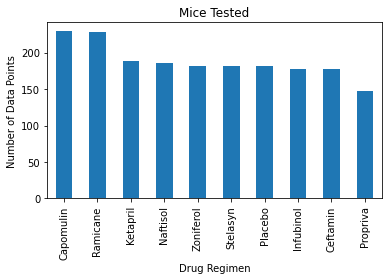

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
regimen_data.plot(kind="bar",figsize=(5.5,4))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Mice Tested")
plt.tight_layout()



<AxesSubplot:ylabel='Sex'>

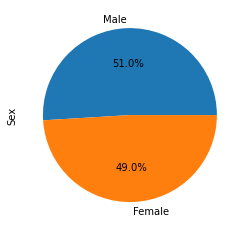

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mf_count = cleaned_df['Sex'].value_counts()
mf_count.plot(kind="pie", autopct="%1.1f%%")


Text(0, 0.5, 'Sex')

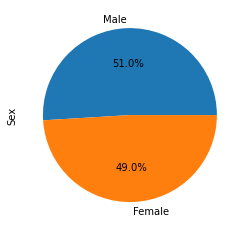

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mf_count.values, labels=mf_count.index.values,autopct="%1.1f%%")
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
timepoint_max_df = pd.DataFrame(cleaned_df.groupby(['Mouse ID'])['Timepoint'].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_max_df= pd.merge(cleaned_df, timepoint_max_df, how='right', on=('Mouse ID', 'Timepoint'))

merged_max_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
 
treatment_list=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

capomulin = merged_max_df.loc[merged_max_df["Drug Regimen"] == "Capomulin",:]
capo = capomulin['Tumor Volume (mm3)']

ramicane = merged_max_df.loc[merged_max_df["Drug Regimen"] == "Ramicane",:]
rami = ramicane['Tumor Volume (mm3)']

infubinol = merged_max_df.loc[merged_max_df["Drug Regimen"] == "Infubinol",:]
infu = infubinol['Tumor Volume (mm3)']

ceftamin = merged_max_df.loc[merged_max_df["Drug Regimen"] == "Ceftamin",:]
caft = ceftamin['Tumor Volume (mm3)']


quartiles = capo.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

quartiles = capo.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of capo is: {lowerq}")
print(f"The upper quartile of capo is: {upperq}")
print(f"The interquartile range of capo is: {iqr}")
print(f"The the median of capo is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_df = capomulin.loc[(capomulin['Tumor Volume (mm3)']<lower_bound)|(capomulin['Tumor Volume (mm3)']>upper_bound)]
num_outlier =len(outlier_df)
print(num_outlier) 

The lower quartile of capo is: 32.37735684
The upper quartile of capo is: 40.1592203
The interquartile range of capo is: 7.781863460000004
The the median of capo is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
0


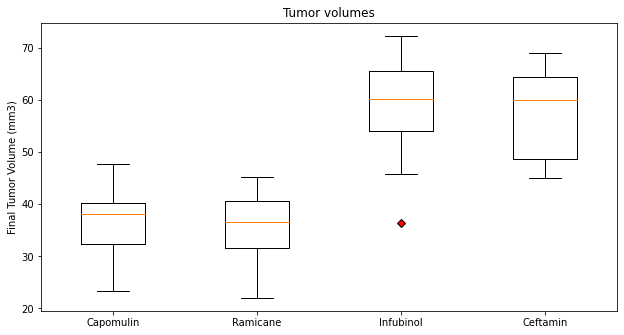

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


data = [capo, rami, infu, caft]

fig = plt.figure(figsize =(8, 4))
 
ax = fig.add_axes([0, 0, 1, 1])
red_diamond = dict(markerfacecolor='r', marker='D')
plt.boxplot(data, labels=treatment_list,flierprops=red_diamond) 
ax.set_title('Tumor volumes')
ax.set_ylabel('Final Tumor Volume (mm3)')
 
plt.show()

## Line and Scatter Plots

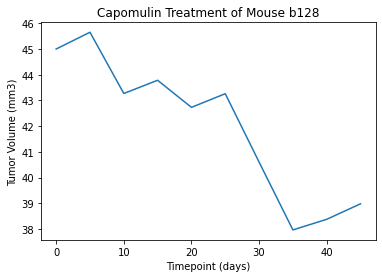

In [58]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouseb128_capomulin = cleaned_df.loc[cleaned_df['Mouse ID'] == 'b128']
plt.plot(mouseb128_capomulin['Timepoint'], mouseb128_capomulin['Tumor Volume (mm3)'])

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse b128")
plt.show()

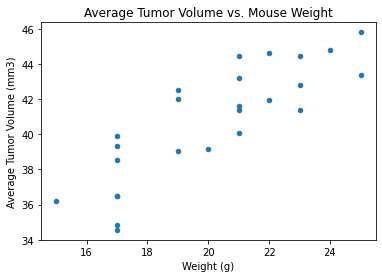

In [96]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
data_capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]

avg_renamed_df = data_capomulin_df.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'})

avg_tumor_volume = avg_renamed_df.groupby(['Mouse ID']).mean()

avg_tumor_volume.head()

avg_tumor_volume.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)", figsize=(6,4),
                           
              title="Average Tumor Volume vs. Mouse Weight"  )
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# using Pearson correlation coefficient calculate coeff. between "average tumor volume and mouse weight"
#using the decicated capomulin df(average_tumor_volume)
cleaned_avg_tumor_volume = avg_tumor_volume.iloc[:,2]
mouse_weight = avg_tumor_volume.iloc[:,7]

correlation = st.pearsonr(mouse_weight,avg_tumor_volume)


x_values = avg_tumor_volume['Weight (g)']
y_values = avg_tumor_volume['Average Tumor Volume (mm3)']
plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

x_values = avg_tumor_volume['Weight (g)']
y_values = avg_tumor_volume['Average Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between both factors is {round(correlation[0],2)}")

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
#ran out of time problem solving the errors